# Finding roots of a complex function

In this notebook, we show how to find the root of a complex function

In [1]:
import sys
sys.path.append("../")

import numpy as np
%matplotlib notebook

from fart import solver_tree
import matplotlib.pyplot as plt

# Nth root of a complex

we define $f1(z)$ and its derivative by:
\begin{equation}\label{eq:}
f1(z) = z^{11} - (\frac{1}{2} + i \frac{\sqrt{3}}{2} )
\end{equation}
\begin{equation}
f'_1(z) = 11 z^{10}
\end{equation}



In [33]:
def f1(z, k=0):
    a = 1/2 + 1j*np.sqrt(3)/2
    return z**11 - a

def df1(z, k=0):
    """Derivative of f1"""
    return 11*z**10

In [34]:
domain = [-2.0, -2.0, 2.0, 2.0]

s = solver_tree.Solver(f1, domain, max_depth= 20, deriv_function=df1)
s.solve()

s.clean_double_roots()

print(len(s.zeros))

11


<IPython.core.display.Javascript object>


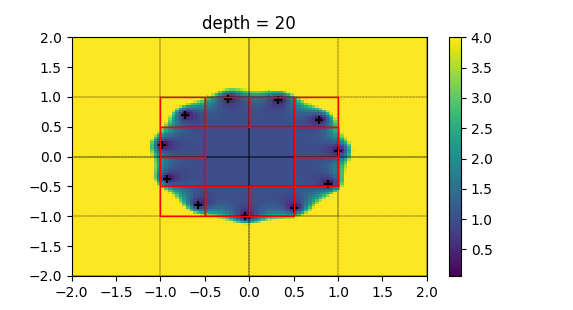

In [5]:
solver_tree.plot_tree(s, f1, domain, k=1, N=100,vmax = 4)

## Without the derivative
Fart can solve the equation without the derivative. 
It will estimate the derivatife by a finit diference scheme, hence it will slow doawn the resolution

In [7]:
s = solver_tree.Solver(f1, domain, max_depth= 20, deriv_function=None)
s.solve()
s.clean_double_roots()
print(len(s.zeros))

/home/tavant/these/code/venv/stand/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/home/tavant/these/code/venv/stand/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


11


# With $f'/f$

You can also provide $f'/f$ if it can speed up its evaluation

In [9]:
def df1_over_f1(z):
    return df1(z)/f1(z)

s = solver_tree.Solver(f1, domain, max_depth= 20, deriv_function=df1_over_f1, df_over_f=True)
s.solve()

s.clean_double_roots()

print(len(s.zeros))

11


# A more complex function 
This academic example has 424 roots on the domain $ (-20.3, -5.0, 20.7, 5.1)$.

It is a bit more complex to solve, but we can suceed !

In [11]:
def f2(z, k=0):
    return z**50 + z**12 - 5*np.sin(20*z)*np.cos(12*z) - 1

def df2(z, k=0):
    """Dreivative of f2"""
    v = 50*z**49 + 12*z**11 - 5*(20*np.cos(20*z)*np.cos(12*z) -
                                  12*np.sin(12*z)*np.sin(20*z))
    return v

In [15]:
domain = (-20.3, -5.0, 20.7, 5.1)

s = solver_tree.Solver(f2, domain, max_depth= 20, deriv_function=df2)
s.solve()
print(len(s.zeros))


424


<IPython.core.display.Javascript object>


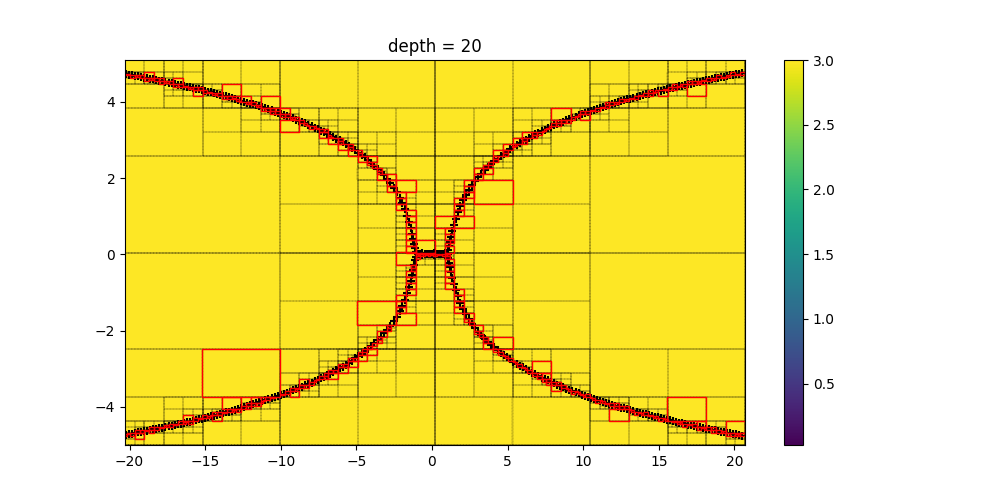

In [30]:
solver_tree.plot_tree(s, f2, domain, k=1, N=1000,vmax = 3)

A zome at the center:

<IPython.core.display.Javascript object>


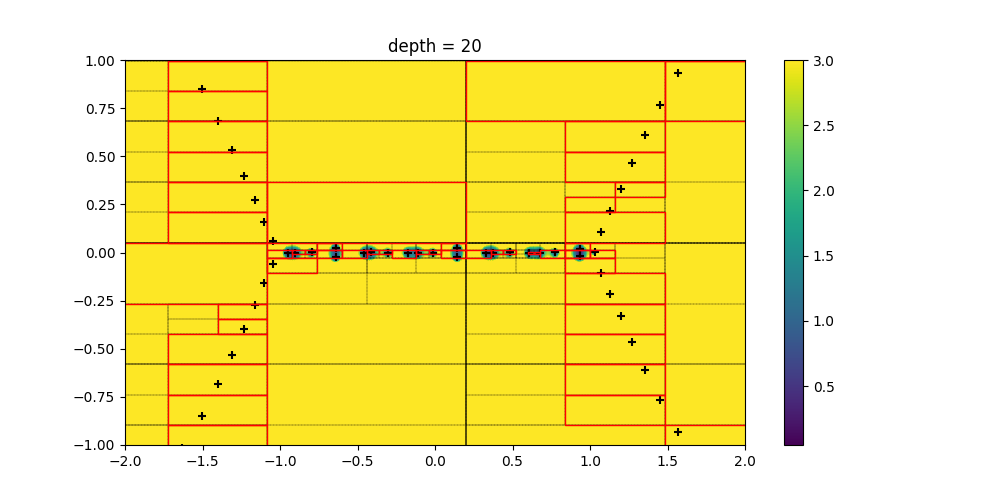

In [32]:
solver_tree.plot_tree(s, f2, ((-2,-1,2,1)), k=1, N=1000,vmax = 3)